In [1]:
%matplotlib inline
import PIL
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
from sklearn import preprocessing
from scipy import signal

In [2]:
indexes = pd.read_csv('output/\CompleteWeeklyIndexes.csv', parse_dates=True,  index_col=0)
indexes['date'] = pd.to_datetime(indexes.index)
indexes.set_index('date', inplace=True)
indexes.head()

,sp500_Close,sp500_Volume,vix_Close,vix_Volume,dji_Close,dji_Volume,ndx_Close,ndx_Volume,n225_Close,n225_Volume,...,hsi_Close,hsi_Volume,n100_Close,n100_Volume,Overall EMV Tracker,infectious_daily_infect_emv_index,GPR,trade_US Trade Policy Uncertainty,trade_Japanese Trade Policy Uncertainty,trade_Trade Policy EMV Fraction
date,,,,,,,,,,,,,,,,,,,,,
2000-01-07,1441.469971,1.225200e+09,21.719999,0.0,11522.559570,184900000.0,3529.600098,1.634930e+09,18193.410156,0.0,...,15405.629883,0.0,943.880005,0.0,NaN,0.00,NaN,NaN,NaN,NaN
2000-01-14,1465.150024,1.085900e+09,19.660000,0.0,11722.980469,266830000.0,3704.739990,1.656630e+09,18956.550781,0.0,...,15542.230469,0.0,973.859985,0.0,NaN,0.00,NaN,NaN,NaN,NaN
2000-01-21,1441.359985,1.209800e+09,20.820000,0.0,11251.709961,205840000.0,3849.959961,1.923680e+09,18878.089844,0.0,...,15108.410156,0.0,951.510010,0.0,NaN,0.00,NaN,NaN,NaN,NaN
2000-01-28,1360.160034,1.095800e+09,26.139999,0.0,10738.870117,183090000.0,3446.129883,1.616370e+09,19434.779297,0.0,...,16185.940430,0.0,948.210022,0.0,24.412899,0.00,NaN,71.914247,117.577146,0.033573
2000-02-04,1424.369995,1.045100e+09,21.540001,0.0,10963.799805,166590000.0,3874.370117,1.751450e+09,19763.130859,0.0,...,NaN,NaN,1010.429993,0.0,NaN,0.75,NaN,NaN,NaN,NaN


In [15]:
def plot_index(indexes, name):
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.plot(indexes.index, indexes[name], 'o-' , markersize=1)
    plt.axhline(np.mean(indexes[name].loc['2000-01-01':'2015-01-01']), ls=':')
    plt.title(name)
    plt.show()
    plt.subplot(2, 1, 1)
    normalized = preprocessing.normalize([np.array(indexes[name].fillna(0))])
    corr = signal.correlate(normalized, normalized, mode='full')
    plt.plot(corr[0], 'o-', markersize=2)
    plt.axhline(2/np.sqrt(len(indexes[name])), ls=':')
    plt.axhline(-2/np.sqrt(len(indexes[name])), ls=':')
    plt.title(name + ' auto-correlation')
    plt.show()

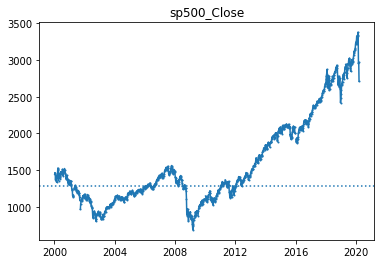

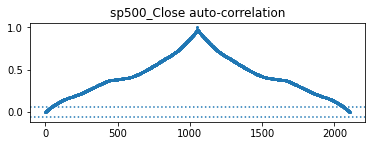

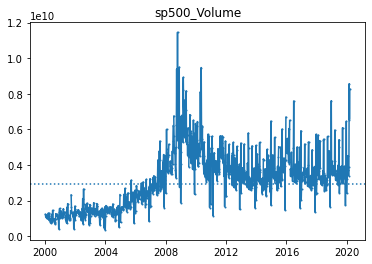

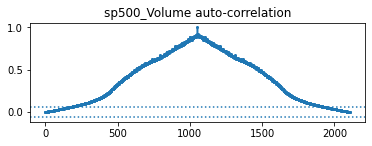

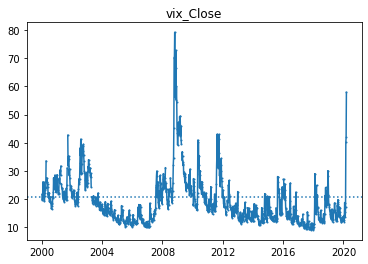

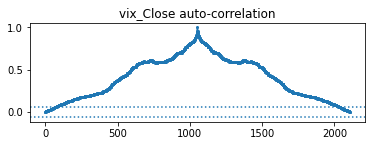

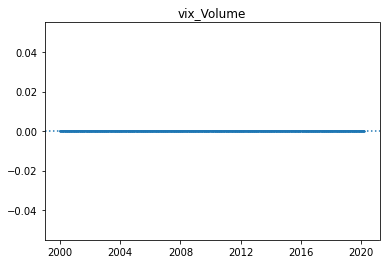

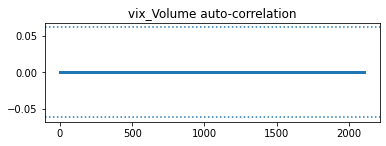

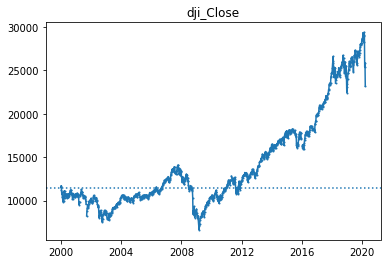

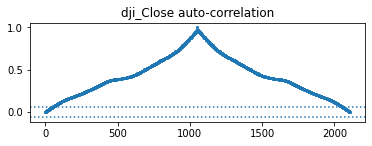

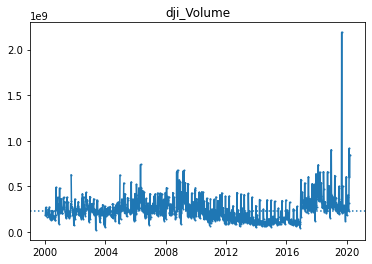

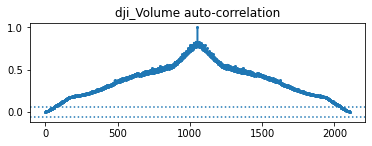

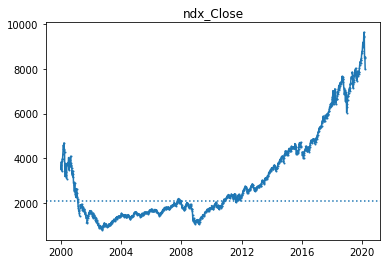

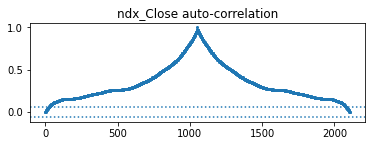

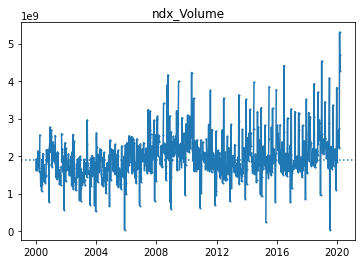

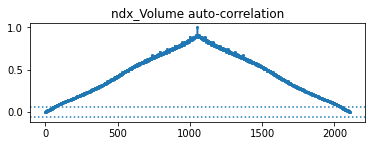

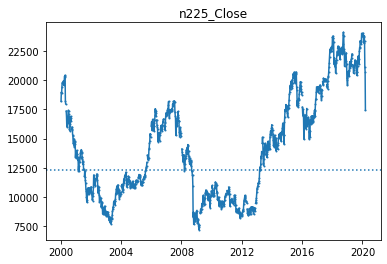

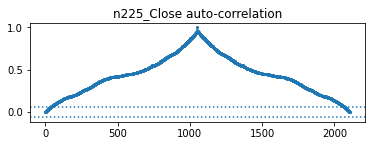

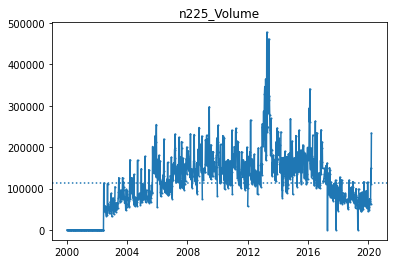

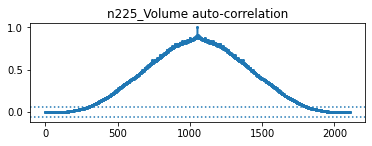

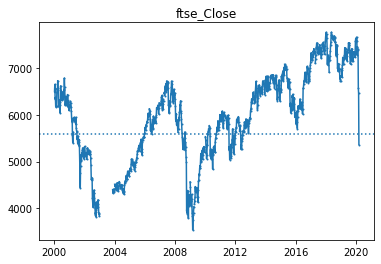

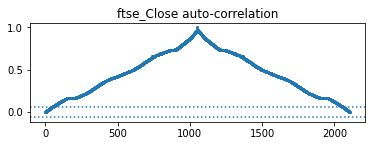

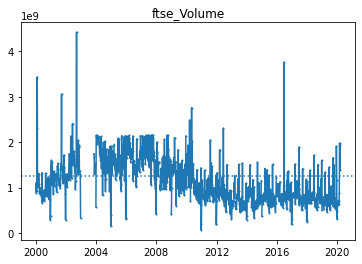

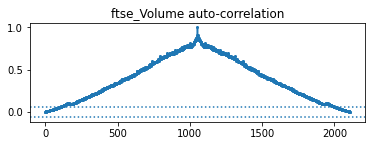

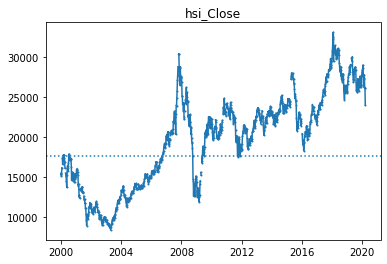

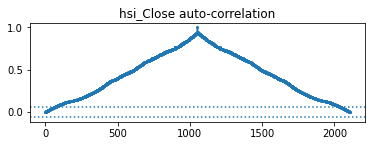

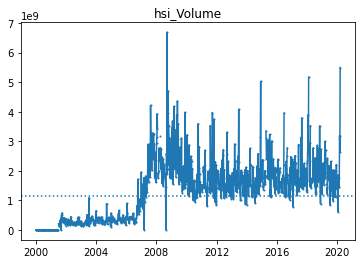

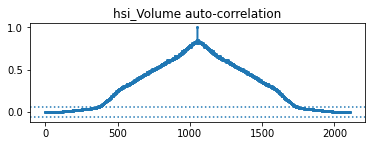

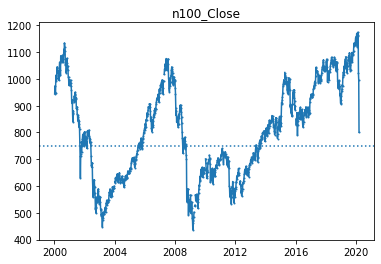

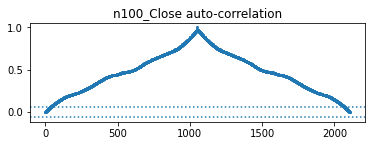

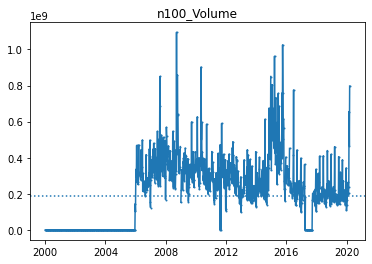

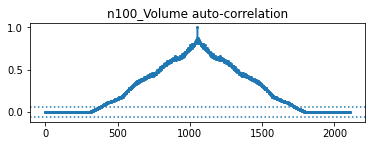

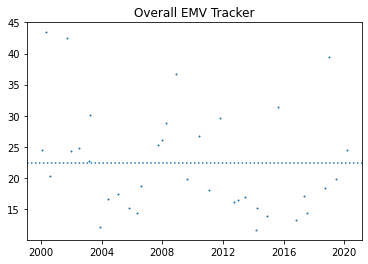

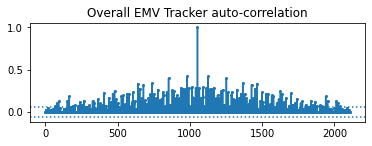

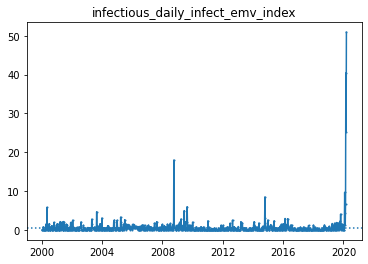

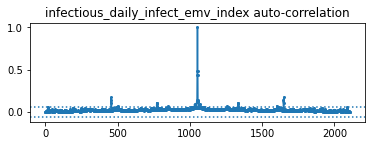

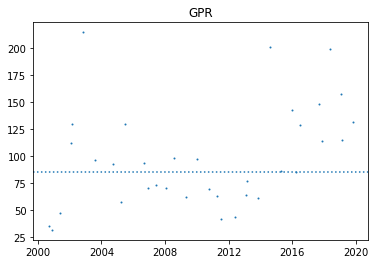

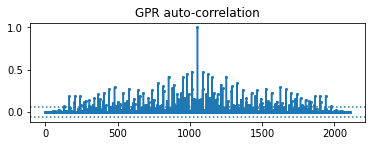

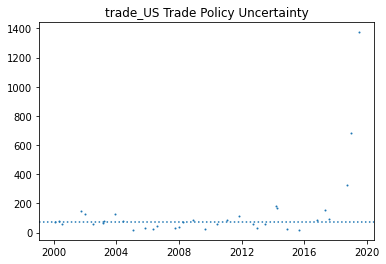

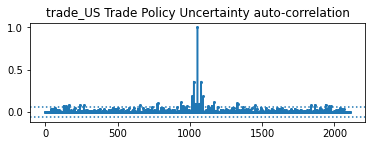

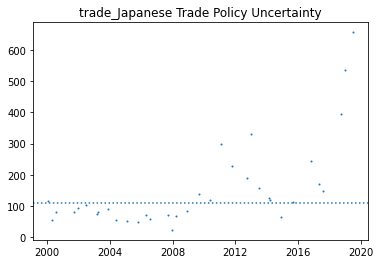

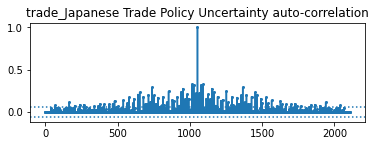

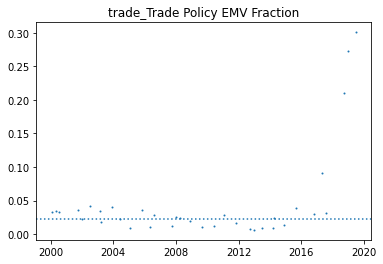

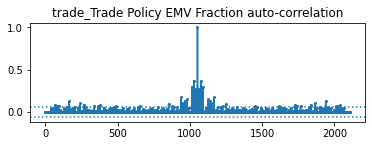

In [16]:
for column in indexes.columns:
    plot_index(indexes, column)
    